In [1]:
# Advanced Regressions

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
from numpy import mean
from numpy import std

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
#Import scikit-learn metrics module for accuracy calculations
from sklearn import metrics
#Import train_test_split function
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
# Read-in data
os.getcwd()
absent = pd.read_csv("../input/absenteeism-at-work/absenteeism_at_work_cleansed.csv")
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


**Review of Data Set**

In [3]:
#Review data
absent.shape
# (740,21)

(740, 21)

In [4]:
# To Check Null Values
absent.isnull().sum()
# No Nulls

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
# Get Statistics from the data.
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
#Identify correlation
corr = absent.corr()
print(corr)

                                       ID  Reason for absence  \
ID                               1.000000           -0.064245   
Reason for absence              -0.064245            1.000000   
Month of absence                -0.000043           -0.083858   
Day of the week                  0.034468            0.116319   
Seasons                          0.098495           -0.117925   
Transportation expense          -0.224163           -0.119381   
Distance from Residence to Work -0.486160            0.161831   
Service time                    -0.272704            0.048425   
Age                              0.040899           -0.078608   
Hit target                       0.018789            0.088943   
Disciplinary failure             0.004502           -0.545054   
Education                       -0.036254           -0.047357   
Son                              0.002767           -0.055364   
Social drinker                  -0.451338            0.065441   
Social smoker            

In [7]:
# Check the skewness value. This should be between -1 and +1. Any deviation from this indicates extreme values
print(absent.skew())

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


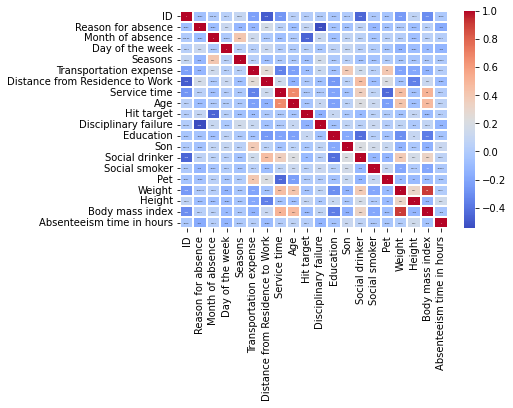

In [8]:
# Create a heatmap
sns.heatmap(corr, annot=True, linewidth = 0.1, cmap = 'coolwarm', annot_kws={"fontsize":2})
plt.show()

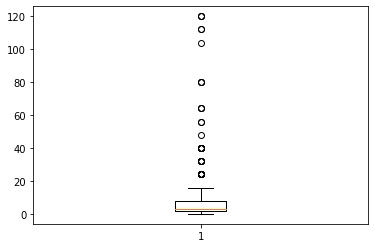

In [9]:
# Show the Absenteeism time in hours in box plot for outliers

plt.boxplot(absent['Absenteeism time in hours'])
plt.show()

**Understanding Outliers**

In [10]:
# Outlier treatment (Quantile-Based Flooring & Capping) - Absenteeism time in hours

print(absent['Absenteeism time in hours'].quantile(0.10))
print(absent['Absenteeism time in hours'].quantile(0.90))

1.0
8.0


In [11]:
# Removing the outliers (Absenteeism time in hours)
absent["Absenteeism time in hours"] = np.where(absent["Absenteeism time in hours"] <1.0, 1.0,absent['Absenteeism time in hours'])
absent["Absenteeism time in hours"] = np.where(absent["Absenteeism time in hours"] >8.0, 8.0,absent['Absenteeism time in hours'])
print(absent["Absenteeism time in hours"].skew())

0.31388876890872025


In [12]:
# Check the skewness value. This should be between -1 and +1. Any deviation from this indicates extrem values
print(absent.skew())

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          0.313889
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
# Months of absence & Seasons Correlation Ration -  0.40
# Pet & Transportation Expense – 0.40
# Transportation Expense & Distance from residence to Work – 0.26
# Transportation Expense & Son – 0.38
# Weight & Social Drinking - 0.37
# Service TIme & Weight – 0.45
# Service Time & Body Mass Index – 0.49
# Body Mass index & Weight - 0.90

**Set Variables for Predictions**

In [14]:
# Varibles to predict Absenteeism time in hours
x=absent[['Service time','Weight','Body mass index']]
x_labels=['Service time','Weight','Body mass index']
y=absent['Absenteeism time in hours']

**Spliting Training & Test Data**

In [15]:
# 70% training and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Training and Testing Initial Regression Model**

In [16]:
# Initialize the linear regression model
reg = linear_model.LinearRegression()

In [17]:
# Train the model with Training data
reg.fit(x_train, y_train)
print(x_train.shape);print(x_test.shape)

(518, 3)
(222, 3)


In [18]:
# Print the coefficients/weights for each feature/column of our model
print(reg.coef_)

[-0.06057818  0.0407652  -0.13707181]


In [19]:
# Print the predictions on the data
y_pred = reg.predict(x_test)
print(y_pred)

[4.5726513  3.86619429 4.42550596 4.35894013 3.88324899 4.97332213
 4.5726513  4.72806277 4.3639769  3.88324899 4.22899521 4.69964958
 4.35894013 3.88324899 4.5726513  5.34994838 4.5726513  4.5726513
 4.35894013 4.42550596 5.42772697 3.86619429 3.88324899 4.25013579
 4.5726513  4.29461015 3.88324899 4.53449866 4.53449866 4.3639769
 4.3639769  4.5726513  4.3639769  4.25013579 4.97332213 3.88324899
 4.19326677 3.86619429 4.1175783  3.93180924 4.68002497 4.3639769
 5.42772697 4.20414546 4.74074886 3.88324899 5.34994838 4.42550596
 4.35894013 4.72806277 4.6566059  5.19258379 3.86619429 4.41690575
 4.1175783  4.3639769  4.36492778 4.42550596 3.771498   4.19326677
 4.5726513  4.20414546 3.88324899 4.74074886 4.29461015 4.51938837
 4.53449866 4.41690575 3.88324899 4.3639769  3.88324899 4.3639769
 3.88324899 4.22899521 4.35894013 4.20414546 4.53449866 3.88324899
 5.19258379 4.41690575 4.25968688 4.5726513  3.88324899 4.97332213
 4.35894013 3.88324899 4.42550596 4.1175783  4.3639769  4.20414546

In [20]:
# Print the actual values
print(y_test)

120    1.0
416    4.0
334    8.0
350    2.0
412    4.0
      ... 
360    2.0
396    8.0
651    2.0
275    3.0
209    4.0
Name: Absenteeism time in hours, Length: 222, dtype: float64


In [21]:
# Checking the performance/Accuracy of the Model using MEAN SQUARE ERROR (MSE)
print(np.mean( (y_pred - y_test)**2))

# This number should be as close to Zero as possible.
# This model is very bad.

8.337573750601369


In [22]:
# Checking the performance/Accuracy of the Model using MEAN SQUARE ERROR (MSE)and sllearn.metrics
print(mean_squared_error(y_test,y_pred))
r_sq = reg.score(x_train, y_train)
print('coeffcient of determination:', r_sq)

8.337573750601369
coeffcient of determination: 0.019968864641278672


****Build Model 1 - Linear Regression ****

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
# Define Model - Output
pred_train_lr= lr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

2.8758489974685286
0.019968864641278672


In [25]:
pred_test_lr= lr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))
print('interceptor:', reg.intercept_)
print('slope:', reg.coef_)

2.8874857143545087
-0.025270620924239928
interceptor: 5.594779647694555
slope: [-0.06057818  0.0407652  -0.13707181]


**Build Model 2 - Lasso**

In [26]:
#Initialize model
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
pred_train_lasso= model_lasso.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

2.8758581145985227
0.01996265076465986


In [27]:
pred_test_lasso= model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

2.8869290887057524
-0.024875372618734515


**Build Model 3 - Decision Tree**

In [28]:
#Initialize model
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [29]:
# Model Performance on Test Data

pred_test_tree= dtree.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree)))
print(r2_score(y_test, pred_test_tree))

2.7972159350231953
0.03783221561254968


In [30]:
# Improve the model by tuning the parameters ('max depth of 2 & 5')

dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(x_train, y_train)
dtree2.fit(x_train, y_train)

tr1 = dtree1.predict(x_train)
tr2 = dtree2.predict(x_train)

y1 = dtree1.predict(x_test)
y2 = dtree2.predict(x_test)

In [31]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1)))
print(r2_score(y_train, tr1))

2.761705472488049
0.0962206026779312


In [32]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1)))
print(r2_score(y_test, y1))

2.8428133629117975
0.006207944136604193


In [33]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2)))
print(r2_score(y_train, tr2))

2.6177912997554635
0.1879593768352632


In [34]:
# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2)))
print(r2_score(y_test, y2))

2.7884139798003345
0.04387796494591578
